In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
import calendar 
import warnings        
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:/Users/neeli/Desktop/data.csv", encoding = "ISO-8859-1")

In [4]:
pd.options.display.float_format = "{:.2f}".format

In [5]:
df.shape

(541909, 8)

In [6]:
df.head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.00,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.00,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.00,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.00,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.00,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Data Cleaning

In [11]:
df[df.isin(["NA","NaN","Na","na","N/A",
                "n/a","missing","MISSING",
                "no data","nodata","","?",
                "??","???","????","?????"]).any(axis=1)].shape

(58, 8)

In [12]:
df[df.isin(["NA","NaN","Na","na","N/A",
                "n/a","missing","MISSING",
                "no data","nodata","","?",
                "??","???","????","?????"]).any(axis=1)].head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
7313,537032,21275,?,-30,2010-12-03 16:50:00,0.00,nan,United Kingdom
21518,538090,20956,?,-723,2010-12-09 14:48:00,0.00,nan,United Kingdom
38261,539494,21479,?,752,2010-12-20 10:36:00,0.00,nan,United Kingdom
43662,540100,22837,?,-106,2011-01-04 16:53:00,0.00,nan,United Kingdom
50806,540558,21258,?,-29,2011-01-10 10:04:00,0.00,nan,United Kingdom
51673,540651,82599,?,-290,2011-01-10 15:00:00,0.00,nan,United Kingdom
68920,541882,48185,?,-57,2011-01-24 10:54:00,0.00,nan,United Kingdom
78235,542861,47591B,?,-207,2011-02-01 11:47:00,0.00,nan,United Kingdom
94765,544410,84997C,?,-741,2011-02-18 13:54:00,0.00,nan,United Kingdom
97643,544649,21621,?,-400,2011-02-22 12:37:00,0.00,nan,United Kingdom


In [13]:
df["UnitPrice"].describe()

count   541909.00
mean         4.61
std         96.76
min     -11062.06
25%          1.25
50%          2.08
75%          4.13
max      38970.00
Name: UnitPrice, dtype: float64

In [14]:
#Lets start by checking unit price 0
df[df["UnitPrice"] == 0].shape

(2515, 8)

In [15]:
# number of unique Descriptions when UnitPrice is 0
df[df["UnitPrice"] == 0]["Description"].nunique(dropna = False)

377

In [16]:
df[df["UnitPrice"] == 0]["Description"].unique()[0:10]

array([nan, 'amazon', '?', 'ROUND CAKE TIN VINTAGE GREEN', 'check',
       'damages', 'CREAM SWEETHEART LETTER RACK',
       'ZINC WILLIE WINKIE  CANDLE STICK', 'BOX OF 24 COCKTAIL PARASOLS',
       'DOORMAT ENGLISH ROSE '], dtype=object)

In [17]:
df = df[df["UnitPrice"] != 0]

In [18]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132605
Country             0
dtype: int64

In [19]:
#Lets check for unit price less than 0
df[df["UnitPrice"] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,nan,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,nan,United Kingdom


In [20]:
df[df["Description"].str.lower().str.contains("adjust")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,nan,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,nan,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,nan,United Kingdom


In [21]:
df = df[df["Description"].str.lower().str.contains("adjust") == False]

In [22]:
#Now lets see wrong descriptions
df["Description"].nunique(dropna = False)

4041

In [23]:
df["Description"] = df["Description"].str.strip()

In [24]:
df["Description"].nunique(dropna = False)

4030

In [25]:
df[df["Description"].str.contains("PAPER CRAFT")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.00,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.00,United Kingdom


In [26]:
df[df["InvoiceNo"].str.startswith("C")].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.00,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.00,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.00,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.00,United Kingdom


In [27]:
credit_descr = pd.Series(df[df["InvoiceNo"].str.startswith("C")]["Description"].unique())
credit_descr

0                                 Discount
1          SET OF 3 COLOURED  FLYING DUCKS
2            PLASTERS IN TIN CIRCUS PARADE
3          PACK OF 12 PINK PAISLEY TISSUES
4          PACK OF 12 BLUE PAISLEY TISSUES
                       ...                
1966                ELEPHANT BIRTHDAY CARD
1967              AFGHAN SLIPPER SOCK PAIR
1968    SMALL SQUARE CUT GLASS CANDLESTICK
1969          HOUSE SHAPE PENCIL SHARPENER
1970           PAPER CRAFT , LITTLE BIRDIE
Length: 1971, dtype: object

In [28]:
credit_descr[credit_descr.str.isupper() == False]

0                                 Discount
57           NUMBER TILE COTTAGE GARDEN No
133                           Bank Charges
147                                 Manual
320         FRENCH BLUE METAL DOOR SIGN No
626                BAG 125g SWIRLY MARBLES
767                BAG 500g SWIRLY MARBLES
800         FOLK ART GREETING CARD,pack/12
1229    3 TRADITIONAl BISCUIT CUTTERS  SET
1275          POLYESTER FILLER PAD 40x40cm
1304                     Next Day Carriage
1305          POLYESTER FILLER PAD 45x45cm
1355               BAG 250g SWIRLY MARBLES
1511                       CRUK Commission
dtype: object

In [29]:
df = df[df["Description"].isin(["Bank Charges", "CRUK Commission"]) == False]

In [30]:
credit_descr[credit_descr.str.len() < 15]

0             Discount
93          BUTTON BOX
127            POSTAGE
133       Bank Charges
134            SAMPLES
136         AMAZON FEE
147             Manual
183     RETROSPOT LAMP
188          BINGO SET
196     RETRO MOD TRAY
266     JUMBO BAG TOYS
321      POTTERING MUG
455           CARRIAGE
471      CHILLI LIGHTS
493      PINK DOG BOWL
497      FIRST AID TIN
502     JUMBO BAG OWLS
572        FROG CANDLE
685     DOTCOM POSTAGE
746     MIRROR CORNICE
811      PARTY BUNTING
885     FUNKY DIVA PEN
950     DOORMAT HEARTS
1127    SPOTTY BUNTING
1181       WICKER STAR
1217    KEY FOB , SHED
1247    POPCORN HOLDER
1385      TOYBOX  WRAP
1392    SANDALWOOD FAN
1401    GLAMOROUS  MUG
1483    PACKING CHARGE
1519    SHOE SHINE BOX
1731      WRAP COWBOYS
1848    MILK MAIDS MUG
dtype: object

In [31]:
df = df[df["Description"].isin(["AMAZON FEE", "SAMPLES", "POSTAGE", "PACKING CHARGE"]) == False]

In [32]:
list_dotcom = df[df["Description"].replace({np.nan:""}).str.lower().str.contains("dotcom", regex = True)] \
["Description"].unique().tolist()

list_dotcom

['DOTCOM POSTAGE',
 'MUG , DOTCOMGIFTSHOP.COM',
 'Dotcomgiftshop Gift Voucher £40.00',
 'Dotcomgiftshop Gift Voucher £50.00',
 'Dotcomgiftshop Gift Voucher £30.00',
 'Dotcomgiftshop Gift Voucher £20.00',
 'DOTCOMGIFTSHOP TEA TOWEL',
 'Dotcomgiftshop Gift Voucher £10.00',
 'Dotcomgiftshop Gift Voucher £100.00']

In [33]:
df["Description"] = df["Description"].replace(list_dotcom, "DOTCOM")

In [34]:
list_dotcom

['DOTCOM POSTAGE',
 'MUG , DOTCOMGIFTSHOP.COM',
 'Dotcomgiftshop Gift Voucher £40.00',
 'Dotcomgiftshop Gift Voucher £50.00',
 'Dotcomgiftshop Gift Voucher £30.00',
 'Dotcomgiftshop Gift Voucher £20.00',
 'DOTCOMGIFTSHOP TEA TOWEL',
 'Dotcomgiftshop Gift Voucher £10.00',
 'Dotcomgiftshop Gift Voucher £100.00']

In [35]:
#lets deal with descriptions related to stockcode
df["Description"].nunique()

4016

In [36]:
df["StockCode"].nunique()

3931

In [37]:
num_descriptions = df.groupby("StockCode")["Description"].nunique().sort_values(ascending = False)
num_descriptions

StockCode
23236     4
23196     4
22776     3
23413     3
23126     3
         ..
46776D    1
46776C    1
46776B    1
46776A    1
10002     1
Name: Description, Length: 3931, dtype: int64

In [38]:
num_descriptions.value_counts()

1    3714
2     200
3      15
4       2
Name: Description, dtype: int64

In [39]:
groups = df.groupby("StockCode")["Description"].unique()
groups

StockCode
10002            [INFLATABLE POLITICAL GLOBE]
10080              [GROOVY CACTUS INFLATABLE]
10120                          [DOGGY RUBBER]
10123C                 [HEARTS WRAPPING TAPE]
10124A          [SPOTS ON RED BOOKCOVER TAPE]
                            ...              
gift_0001_20                         [DOTCOM]
gift_0001_30                         [DOTCOM]
gift_0001_40                         [DOTCOM]
gift_0001_50                         [DOTCOM]
m                                    [Manual]
Name: Description, Length: 3931, dtype: object

In [40]:
groups[groups.str.len() > 1]

StockCode
16156L                      [WRAP, CAROUSEL, WRAP CAROUSEL]
17107D    [FLOWER FAIRY,5 SUMMER B'DRAW LINERS, FLOWER F...
20622               [VIPPASSPORT COVER, VIP PASSPORT COVER]
20725       [LUNCH BAG RED RETROSPOT, LUNCH BAG RED SPOTTY]
20914     [SET/5 RED RETROSPOT LID GLASS BOWLS, SET/5 RE...
                                ...                        
85184C    [S/4 VALENTINE DECOUPAGE HEART BOX, SET 4 VALE...
85185B    [PINK HORSE SOCK PUPPET, PINK HORSE SOCK PUPPE...
90014A    [SILVER/MOP ORBIT NECKLACE, SILVER M.O.P. ORBI...
90014B    [GOLD M PEARL  ORBIT NECKLACE, GOLD M.O.P. ORB...
90014C    [SILVER/BLACK ORBIT NECKLACE, SILVER AND BLACK...
Name: Description, Length: 217, dtype: object

In [41]:
dictionary = {}
for index, group in groups.items():
    dictionary[index] =  group[0]

In [42]:
list(dictionary.items())[0:10]

[('10002', 'INFLATABLE POLITICAL GLOBE'),
 ('10080', 'GROOVY CACTUS INFLATABLE'),
 ('10120', 'DOGGY RUBBER'),
 ('10123C', 'HEARTS WRAPPING TAPE'),
 ('10124A', 'SPOTS ON RED BOOKCOVER TAPE'),
 ('10124G', 'ARMY CAMO BOOKCOVER TAPE'),
 ('10125', 'MINI FUNKY DESIGN TAPES'),
 ('10133', 'COLOURING PENCILS BROWN TUBE'),
 ('10135', 'COLOURING PENCILS BROWN TUBE'),
 ('11001', 'ASSTD DESIGN RACING CAR PEN')]

In [43]:
descriptions = pd.DataFrame()

In [44]:
descriptions["StockCode"] = list(dictionary.keys())

In [45]:
descriptions["Unique_Description"] = list(dictionary.values())

In [46]:
descriptions.head(10)

,StockCode,Unique_Description
0,10002,INFLATABLE POLITICAL GLOBE
1,10080,GROOVY CACTUS INFLATABLE
2,10120,DOGGY RUBBER
3,10123C,HEARTS WRAPPING TAPE
4,10124A,SPOTS ON RED BOOKCOVER TAPE
5,10124G,ARMY CAMO BOOKCOVER TAPE
6,10125,MINI FUNKY DESIGN TAPES
7,10133,COLOURING PENCILS BROWN TUBE
8,10135,COLOURING PENCILS BROWN TUBE
9,11001,ASSTD DESIGN RACING CAR PEN


In [47]:
df = df.merge(descriptions, on = "StockCode", how = "inner")

In [48]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unique_Description
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
1,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.00,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
2,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.00,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
3,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-12-01 10:19:00,2.55,17511.00,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
4,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-12-01 10:39:00,2.55,13408.00,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER


In [49]:
df["Description"].nunique()

4016

In [50]:
df["Unique_Description"].nunique()

3788

In [51]:
df["Description"] = df["Unique_Description"]
df = df.drop("Unique_Description", axis = 1)

In [52]:
df["StockCode"].nunique()

3931

In [53]:
descr_counts = pd.Series(descriptions["Unique_Description"].value_counts())
descr_counts[descr_counts > 1]

DOTCOM                                9
METAL SIGN,CUPCAKE SINGLE HOOK        6
SET OF 4 FAIRY CAKE PLACEMATS         4
COLUMBIAN CANDLE ROUND                3
PINK FLOWERS RABBIT EASTER            2
                                     ..
COLUMBIAN CANDLE RECTANGLE            2
4 ROSE PINK DINNER CANDLES            2
PAPER LANTERN 9 POINT SNOW STAR       2
RETRO PLASTIC POLKA TRAY              2
CHARLIE LOLA BLUE HOT WATER BOTTLE    2
Name: Unique_Description, Length: 129, dtype: int64

In [54]:
descriptions[descriptions["Unique_Description"].str.contains("METAL SIGN,CUPCAKE")]

,StockCode,Unique_Description
2889,82613A,"METAL SIGN,CUPCAKE SINGLE HOOK"
2890,82613B,"METAL SIGN,CUPCAKE SINGLE HOOK"
2891,82613C,"METAL SIGN,CUPCAKE SINGLE HOOK"
2893,82613a,"METAL SIGN,CUPCAKE SINGLE HOOK"
2894,82613b,"METAL SIGN,CUPCAKE SINGLE HOOK"
2895,82613c,"METAL SIGN,CUPCAKE SINGLE HOOK"


In [55]:
descriptions[descriptions["Unique_Description"].str.contains("COLUMBIAN CANDLE ROUND")]

,StockCode,Unique_Description
2751,72127,COLUMBIAN CANDLE ROUND
2752,72128,COLUMBIAN CANDLE ROUND
2753,72130,COLUMBIAN CANDLE ROUND


### Outliers

In [56]:
df["ItemTotal"] = df["Quantity"] * df["UnitPrice"]

In [57]:
df.describe()

,Quantity,UnitPrice,CustomerID,ItemTotal
count,537973.00,537973.00,405549.00,537973.00
mean,9.87,4.08,15294.90,18.46
std,215.70,61.50,1710.29,372.65
min,-80995.00,0.00,12346.00,-168469.60
25%,1.00,1.25,13969.00,3.75
50%,3.00,2.08,15159.00,9.84
75%,10.00,4.13,16794.00,17.40
max,80995.00,38970.00,18287.00,168469.60


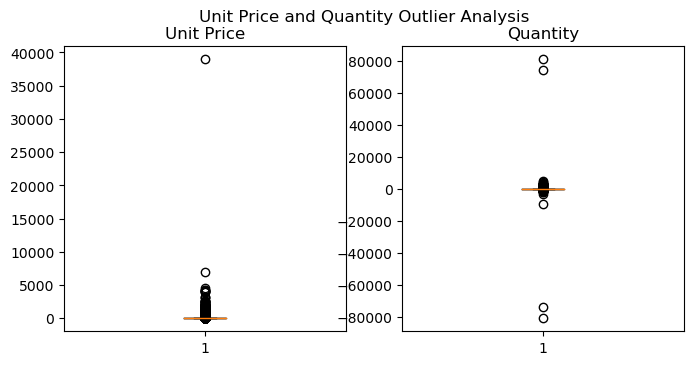

In [58]:
plt.style.use("default")
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (8,3.7))

ax1.boxplot(df["UnitPrice"])
ax1.set_title("Unit Price")
ax2.boxplot(df["Quantity"])
ax2.set_title("Quantity")
fig.suptitle("Unit Price and Quantity Outlier Analysis")
plt.show()

In [59]:
from scipy import stats
z = np.abs(stats.zscore(df["Quantity"])) 
len(np.where(z>3)[0]) 

260

In [60]:
z = np.abs(stats.zscore(df["UnitPrice"])) 
len(np.where(z>3)[0]) 

546

In [61]:
df[np.abs(df["Quantity"]) > 10000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ItemTotal
435713,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.00,United Kingdom,77183.60
435714,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.00,United Kingdom,-77183.60
537971,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.00,United Kingdom,168469.60
537972,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.00,United Kingdom,-168469.60


In [62]:
df = df[np.abs(df["Quantity"]) < 10000]

In [63]:
df[np.abs(df["Quantity"]) > 2000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ItemTotal
6189,562439,84879,ASSORTED COLOUR BIRD ORNAMENT,2880,2011-08-04 18:06:00,1.45,12931.00,United Kingdom,4176.00
39832,554272,21977,PACK OF 60 PINK PAISLEY CAKE CASES,2700,2011-05-23 13:08:00,0.42,12901.00,United Kingdom,1134.00
78976,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.00,United Kingdom,3096.00
115159,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.00,United Kingdom,6539.40
115198,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749.00,United Kingdom,-6539.40
115199,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.10,15749.00,United Kingdom,6539.40
127889,574294,21915,RED HARMONICA IN BOX,2100,2011-11-03 15:47:00,1.06,16333.00,United Kingdom,2226.00
136353,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.00,United Kingdom,-280.80
176902,573995,16014,SMALL CHINESE STYLE SCISSOR,3000,2011-11-02 11:24:00,0.32,16308.00,United Kingdom,960.00
224761,547037,21967,PACK OF 12 SKULL TISSUES,2160,2011-03-20 10:37:00,0.25,14101.00,United Kingdom,540.00


In [64]:
z = np.abs(stats.zscore(df["UnitPrice"]))
df[z > 3].sort_values(by = "UnitPrice", ascending = False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ItemTotal
297271,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.00,United Kingdom,-38970.00
297223,C551699,M,Manual,-1,2011-05-03 14:12:00,6930.00,16029.00,United Kingdom,-6930.00
270619,562955,DOT,DOTCOM,1,2011-08-11 10:14:00,4505.17,nan,United Kingdom,4505.17
297325,560373,M,Manual,1,2011-07-18 12:30:00,4287.63,nan,United Kingdom,4287.63
297324,C560372,M,Manual,-1,2011-07-18 12:26:00,4287.63,17448.00,United Kingdom,-4287.63
...,...,...,...,...,...,...,...,...,...
270206,542906,DOT,DOTCOM,1,2011-02-01 15:12:00,189.59,nan,United Kingdom,189.59
270137,539744,DOT,DOTCOM,1,2010-12-21 15:21:00,189.57,nan,United Kingdom,189.57
297226,C552203,M,Manual,-1,2011-05-06 14:56:00,189.44,nan,United Kingdom,-189.44
270724,573137,DOT,DOTCOM,1,2011-10-27 17:15:00,188.89,nan,United Kingdom,188.89


In [65]:
df[z > 3]["Description"].unique()

array(['Discount', 'PICNIC BASKET WICKER SMALL', 'DOTCOM', 'Manual',
       'VINTAGE RED KITCHEN CABINET', 'LOVE SEAT ANTIQUE WHITE METAL',
       'VINTAGE BLUE KITCHEN CABINET'], dtype=object)

In [66]:
df[df["Description"].str.contains("PICNIC BASKET")].sort_values(by = "UnitPrice", ascending = False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ItemTotal
88771,556444,22502,PICNIC BASKET WICKER SMALL,60,2011-06-10 15:28:00,649.50,15098.00,United Kingdom,38970.00
88772,556446,22502,PICNIC BASKET WICKER SMALL,1,2011-06-10 15:33:00,649.50,15098.00,United Kingdom,649.50
201076,536592,22501,PICNIC BASKET WICKER LARGE,2,2010-12-01 17:06:00,21.23,nan,United Kingdom,42.46
201086,537642,22501,PICNIC BASKET WICKER LARGE,1,2010-12-07 15:33:00,21.23,nan,United Kingdom,21.23
201107,540821,22501,PICNIC BASKET WICKER LARGE,1,2011-01-11 13:16:00,21.23,nan,United Kingdom,21.23
...,...,...,...,...,...,...,...,...,...
88549,C546893,22502,PICNIC BASKET WICKER SMALL,-1,2011-03-17 18:20:00,4.95,14156.00,EIRE,-4.95
88724,553676,22502,PICNIC BASKET WICKER SMALL,32,2011-05-18 12:57:00,4.95,16553.00,United Kingdom,158.40
88422,541181,22502,PICNIC BASKET WICKER SMALL,16,2011-01-14 11:50:00,4.95,12877.00,United Kingdom,79.20
201410,555520,22501,PICNIC BASKET WICKER LARGE,1,2011-06-05 11:14:00,3.00,15038.00,United Kingdom,3.00


In [67]:
df = df.drop(df.index[[88771,88772,297271]])

# Analysis and Visualization Starts

In [77]:
df.shape

(537966, 9)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537966 entries, 0 to 537970
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    537966 non-null  object        
 1   StockCode    537966 non-null  object        
 2   Description  537966 non-null  object        
 3   Quantity     537966 non-null  int64         
 4   InvoiceDate  537966 non-null  datetime64[ns]
 5   UnitPrice    537966 non-null  float64       
 6   CustomerID   405542 non-null  float64       
 7   Country      537966 non-null  object        
 8   ItemTotal    537966 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 41.0+ MB


In [80]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132424
Country             0
ItemTotal           0
dtype: int64

In [81]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ItemTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,15.30
1,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.00,United Kingdom,15.30
2,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.00,United Kingdom,15.30
3,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-12-01 10:19:00,2.55,17511.00,United Kingdom,163.20
4,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-12-01 10:39:00,2.55,13408.00,United Kingdom,81.60
5,536396,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 10:51:00,2.55,17850.00,United Kingdom,15.30
6,536401,85123A,WHITE HANGING HEART T-LIGHT HOLDER,4,2010-12-01 11:21:00,2.95,15862.00,United Kingdom,11.80
7,536406,85123A,WHITE HANGING HEART T-LIGHT HOLDER,8,2010-12-01 11:33:00,2.55,17850.00,United Kingdom,20.40
8,536502,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 12:36:00,2.95,16552.00,United Kingdom,17.70
9,536520,85123A,WHITE HANGING HEART T-LIGHT HOLDER,3,2010-12-01 12:43:00,2.95,14729.00,United Kingdom,8.85


### What are the Sales Figures for Each Country?

In [82]:
# calculate total sales by country
country_sales = pd.DataFrame(df.groupby("Country") \
["ItemTotal"].sum()).reset_index().rename({"ItemTotal":"TotalSales"},axis=1)

In [83]:
fig = px.pie(country_sales,
             values="TotalSales",
             names="Country",
             title="Percent of Total Sales by Country",
             color_discrete_sequence=px.colors.qualitative.G10
            )

fig.update_traces(
                  textposition="inside",
                  textinfo="percent+label"
                 )
fig.update_layout(
                  margin=dict(l=10, r=50, b=10, t=70, pad=0),
                  titlefont = dict(size = 20)
                 )
iplot(fig)

In [84]:
country_sales = country_sales[country_sales["Country"] \
.isin(["Unspecified", "European Community","United Kingdom"]) == False]

In [85]:
country_sales["Country"] = \
country_sales["Country"].replace({"EIRE": "Ireland",
                                  "Channel Islands": "United Kingdom",
                                  "RSA": "South Africa"})

In [86]:
# https://stackoverflow.com/questions/59812824/plotly-express-plot-not-shown-in-jupyter-notebook
choro_data = dict(
                  type = "choropleth",
                  colorscale = "Agsunset",
                  locations = country_sales["Country"],
                  locationmode = "country names",
                  z = country_sales["TotalSales"].astype(float).round(0).tolist(),
                  hovertext = country_sales["Country"],
                  hovertemplate = "%{hovertext}: £%{z:,.0f} <extra></extra>",
                  # https://stackoverflow.com/questions/59057881/python-plotly-how-to-customize-hover-template-on-with-what-information-to-show
                  colorbar = {"title" : "Total Sales", },
                ) 

layout = dict(
              title = "Total Sales By Country Excluding the UK",
              titlefont = dict(size = 20),
              geo = dict(showframe = False, bgcolor = "#BAEAED",),
              margin={"r":0,"t":50,"l":10,"b":0}  
             )

fig = go.Figure(data=choro_data, layout=layout)
# fig.update_traces(visible = True)
iplot(fig)


In [87]:
choro_data = [dict(
                  type = "choropleth",
                  colorscale = "Agsunset",
                  locations = country_sales["Country"],
                  locationmode = "country names",
                  z = country_sales["TotalSales"].astype(float).round(0).tolist(),
                  hovertext = country_sales["Country"],
                  hovertemplate = "%{hovertext}: £%{z:,.0f} <extra></extra>",
                  # https://stackoverflow.com/questions/59057881/python-plotly-how-to-customize-hover-template-on-with-what-information-to-show
                  colorbar = {"title" : "Total Sales", },
                 ),
              dict(
                  type = "scattergeo", # add static country labels
                  locations = country_sales["Country"],
                  locationmode = "country names",
                  text = country_sales["Country"],
                   hoverinfo = "skip", # do not display static label when hovering over the country
                  mode = "text",
                  textfont=dict( # format the static country labels
                                size = 11, # only these 3 properties are allowed
                                color = "white",
                                family = "Arial"
                               )
                  ) 
            ]
layout = dict(
              title = "Total Sales By Country Excluding the UK",
              titlefont = dict(size = 20),
              geo = dict(
                         showframe = False,
                         bgcolor = "#A4E0E4",
                         projection = dict(scale = 4.5), # default zoom
                         center = dict(lat = 47, lon = 5) # default map position
                         ),
              margin={"r":0,"t":50,"l":10,"b":0}
             )

fig = go.Figure(data = choro_data, layout = layout)
iplot(fig)

### What is the Overall Sales Trend?

In [88]:
print("first date: ", df["InvoiceDate"].min(),"\n", "last date: ", df["InvoiceDate"].max())

first date:  2010-12-01 08:26:00 
 last date:  2011-12-09 12:50:00


In [89]:
df["year"], df["month"] = df["InvoiceDate"].dt.year, df["InvoiceDate"].dt.month

In [90]:
sales = df.groupby(["year","month"])["ItemTotal"].sum() \
.reset_index().rename({"ItemTotal":"TotalSales"},axis=1)

sales

,year,month,TotalSales
0,2010,12,784926.35
1,2011,1,589395.26
2,2011,2,507633.31
3,2011,3,689549.60
4,2011,4,490381.43
5,2011,5,732320.03
6,2011,6,697047.18
7,2011,7,687066.34
8,2011,8,712669.46
9,2011,9,1028512.62


In [91]:
# create rows about April 2010 and November 2010 with averages from preceding and following month 
                                                                                                  
new_rows = pd.DataFrame({"year":[2010,2010],
                         "month": [4,11],
                         "TotalSales": [38123.21,184980.04]},
                         index = [98,99]) # arbitrary indexes

# insert the row in the sales table
sales = pd.concat([new_rows, sales]) \
.sort_values(by=["year","month"]).reset_index(drop=True)

In [92]:
# convert numbers into month names
sales["month"] = sales["month"].apply(lambda x: calendar.month_abbr[x])

# combine month and year
sales["month"] = sales["month"].astype(str) + " " + sales["year"].astype(str)

# drop the redundant year column
sales = sales.drop("year", axis = 1) 

sales = sales[0:23] # drop December 2011 since the data does not cover the whole month

In [93]:
# line chart using plotly expess Scatter
trace = go.Scatter(
                    x = sales["month"],
                    y = sales["TotalSales"],
                    mode = "lines+markers",
                    name = "TotalSales",
                    line = dict(width = 4),
                    marker = dict(
                                  size = 10,
                                  color = "rgba(120, 26, 120, 0.8)"
                                 ),
                    hovertemplate = " %{x}<br>£%{y:,.0f} <extra></extra>",
                  )
line_data = [trace]
layout = dict(
              title = "Total Sales by Month",
              titlefont = dict(size = 20),
              margin=dict(l=10, r=50, b=10, t=70, pad=0),
              xaxis= dict(title= "Month",ticklen = 5,zeroline = False),
              yaxis= dict(title= "Total Sales", tickformat = ",.0f", tickprefix="£")
             )
fig = dict(data = line_data, layout = layout)
iplot(fig)


### How Many Customers Purchased Products Each Month?
### How Many New Customers were There Each Month?

In [94]:
# all orders
len(df["InvoiceNo"].unique())

23539

In [95]:
# invoices with at least one record with missing CustomerID
len(df[df["CustomerID"].isna()]["InvoiceNo"].unique())

1506

In [96]:
df.groupby("InvoiceNo").apply(lambda x: all(np.isnan(i) for i in x["CustomerID"])).tolist().count(True)

1506

In [97]:
customers = df[df["CustomerID"].notna()].groupby(["year", "month"]) \
.agg({"CustomerID": "unique"}) \
.reset_index().rename({"CustomerID": "unique_customer_ids"}, axis = 1)

# calculate the number of unique customers and insert it as a column
customers.insert(2,"unique_customers_this_month", customers["unique_customer_ids"].str.len())

customers.head()

,year,month,unique_customers_this_month,unique_customer_ids
0,2010,12,947,"[17850.0, 17511.0, 13408.0, 15862.0, 16552.0, ..."
1,2011,1,782,"[13313.0, 14606.0, 16282.0, 13680.0, 15164.0, ..."
2,2011,2,798,"[14911.0, 17675.0, 17511.0, 16612.0, 14627.0, ..."
3,2011,3,1019,"[12428.0, 15676.0, 18075.0, 14656.0, 13884.0, ..."
4,2011,4,898,"[18161.0, 17613.0, 13468.0, 16609.0, 15860.0, ..."


In [98]:
ids = []

# creates a running list of customerids up to each month
for index, row in customers.iterrows(): 
    if index == 0:
        ids.append(row["unique_customer_ids"].tolist())
        
    else:   # adds the present ids to the accumulated list of previous ids
        ids.append(row["unique_customer_ids"].tolist() + ids[index-1])

In [99]:
total_customers = []
for i in range(len(ids)):
    total_customers.append(len(set(ids[i]))) # the set removes duplicates  
    
# insert as a column
customers.insert(3, "total_customers", total_customers)

In [100]:
# add the first difference of totaL_customers

customers.insert(3, "new_customers_this_month", customers["total_customers"].diff() \
.replace({np.nan: 98}).astype(int)) # fill in the first value

In [101]:
 # drop the long lists of unique customers
customers = customers.drop("unique_customer_ids", axis = 1)

In [102]:
# create rows about April 2010 and November 2010 with averages from preceding and following months
new_rows = \
pd.DataFrame({"year":[2010,2010],
              "month": [4,11],
              "unique_customers_this_month": [65,271],
              "new_customers_this_month": [59,163],
              "total_customers": [288,803]}, index = [98,99]) # arbitrary indexes

# insert the row in the customers table
customers = pd.concat([new_rows, customers]) \
.sort_values(by=["year","month"]).reset_index(drop=True)

In [103]:
# convert numbers into month names
customers["month"] = customers["month"].apply(lambda x: calendar.month_abbr[x])

# combine month and year
customers["month"] = customers["month"].astype(str) + " " + customers["year"].astype(str)

# drop the redundant year column
customers = customers.drop("year", axis = 1)

customers = customers[0:23] # drop December 2011 since the data does not cover the whole month

In [104]:
trace1 = go.Scatter(
                    x = customers["month"],
                    y = customers["unique_customers_this_month"],
                    mode = "lines+markers",
                    name = "Unique Customers This Month",
                    line = dict(width = 4),
                    marker = dict(
                                  size = 10,
                                  color = "#0E79B2"
                                 ),
                    hovertemplate = "%{x}<br>Unique Customers: %{y} <extra></extra>",
                  )
trace2 = go.Scatter(
                    x = customers["month"],
                    y = customers["new_customers_this_month"],
                    mode = "lines+markers",
                    name = "New Customers This Month",
                    line = dict(width = 4),
                    marker = dict(
                                  size = 10,
                                  color = "rgba(242, 225, 39, 1)"
                                 ),
                    hovertemplate = "%{x}<br>New Customers: %{y} <extra></extra>",
                  )

line_data = [trace1, trace2]
layout = dict(
              title = "Customers by Month",
              titlefont = dict(size = 20),
              margin=dict(l=10, r=50, b=10, t=70, pad=0),
              xaxis= dict(title= "Month",ticklen = 5,zeroline = False),
              yaxis= dict(title= "Number of Customers"),
              legend=dict(
                          font = dict(size = 12),
                          yanchor = "top",
                          y=0.98,
                          x= 0.01
                         )
             )
fig = dict(data = line_data, layout = layout)
iplot(fig)

In [105]:
trace1 = go.Scatter(
                    x = customers["month"],
                    y = customers["unique_customers_this_month"],
                    mode = "lines+markers",
                    name = "Unique Customers This Month",
                    line = dict(width = 4),
                    marker = dict(
                                  size = 10,
                                  color = "#0E79B2"
                                 ),
                    hovertemplate = "%{x}<br>Unique Customers: %{y} <extra></extra>",
                  )
trace2 = go.Scatter(
                    x = customers["month"],
                    y = customers["new_customers_this_month"],
                    mode = "lines+markers",
                    name = "New Customers This Month",
                    line = dict(width = 4),
                    marker = dict(
                                  size = 10,
                                  color = "rgba(242, 225, 39, 1)"
                                 ),
                    hovertemplate = "%{x}<br>New Customers: %{y} <extra></extra>",
                  )
trace3 = go.Scatter(
                    x = customers["month"],
                    y = customers["total_customers"],
                    mode = "lines+markers",
                    name = "Total Customers",
                    line = dict(width = 4),
                    marker = dict(
                                  size = 10,
                                  color = "rgba(242, 39, 127, 1)"
                                 ),
                    hovertemplate = "%{x}<br>Total Customers: %{y} <extra></extra>",
                  )

line_data = [trace1, trace2, trace3]
layout = dict(
              title = "Customers by Month",
              titlefont = dict(size = 20),
              margin=dict(l=10, r=50, b=10, t=70, pad=0),
              xaxis= dict(title= "Month",ticklen = 5,zeroline = False),
              yaxis= dict(title= "Number of Customers"),
              legend=dict(
                          font = dict(size = 12),
                          yanchor = "top",
                          y=0.98,
                          x= 0.01
                         )
             )
fig = dict(data = line_data, layout = layout)
iplot(fig)


### What Time During the Day Do Customers Make the Most Purchases?

In [107]:
# take data only about December 2010 and October, Novermber and December 2011
subset = df[
              ((df["year"] == 2010) & (df["month"] == 12))
              |    
              ((df["year"] == 2011) & (df["month"] == 10))
              |
              ((df["year"] == 2011) & (df["month"] == 11))
              |
              ((df["year"] == 2011) & (df["month"] == 12))
              ]

In [108]:
# extract the hour of purchase from InvoiceDate and add it as a column
subset["hour"] = subset["InvoiceDate"].astype(str).str[11:13].astype(int)

In [109]:
# calculate the total number of orders for each hour of the day in these months

frequency = subset.groupby(["year","month","hour"]) \
.agg({"InvoiceNo":"nunique"}).reset_index() \
.rename({"InvoiceNo": "num_orders"}, axis = 1)

frequency.head()

,year,month,hour,num_orders
0,2010,12,7,2
1,2010,12,8,29
2,2010,12,9,122
3,2010,12,10,213
4,2010,12,11,236


In [71]:
pivot = frequency.pivot(index = "hour", columns = ["year","month"], values = ["num_orders"])

pivot = pd.DataFrame(pivot.to_records()) # flattens multilevel column headings

pivot["hour"] = pivot["hour"].astype(str) + ":00" # make hours more readable

pivot = pivot.set_index("hour")

pivot.index.name = "" # remove index name for plotting

pivot.rename(columns={ # set more readable names
                      pivot.columns[0]:"Dec 2010",
                      pivot.columns[1]:"Oct 2011",
                      pivot.columns[2]:"Nov 2011",
                      pivot.columns[3]:"Dec 2011"
                      }, inplace = True)

pivot

NameError: name 'frequency' is not defined

NameError: name 'pivot' is not defined

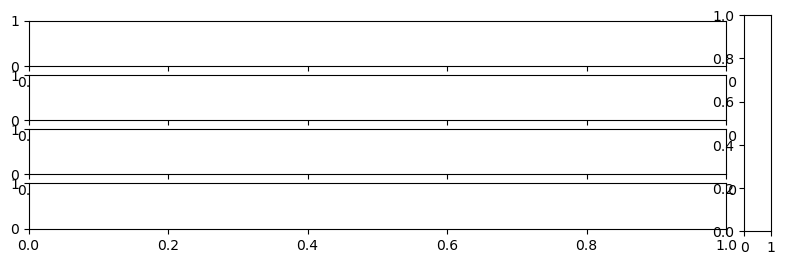

In [111]:
fig, axs = plt.subplots(4,1, figsize = (9,2.7))
cbar_ax = fig.add_axes([0.92, .10, .03, .8]) # add custom colorbar

sns.heatmap(pd.DataFrame(pivot["Dec 2010"]).T, ax = axs[0], cbar = False)
sns.heatmap(pd.DataFrame(pivot["Oct 2011"]).T, ax = axs[1], cbar_ax = cbar_ax, xticklabels=False)
sns.heatmap(pd.DataFrame(pivot["Nov 2011"]).T, ax = axs[2], cbar = False, xticklabels=False)
sns.heatmap(pd.DataFrame(pivot["Dec 2011"]).T, ax = axs[3], cbar = False, xticklabels=False)

cbar = axs[1].collections[0].colorbar # set custom colorbar labels
cbar.set_ticks([30, 190, 350])
cbar.set_ticklabels(["low", "medium", "high"])

axs[0].xaxis.set_ticks_position("top")
axs[0].yaxis.set_ticklabels(axs[0].get_yticklabels(), rotation = 0)
axs[1].yaxis.set_ticklabels(axs[1].get_yticklabels(), rotation = 0)
axs[2].yaxis.set_ticklabels(axs[2].get_yticklabels(), rotation = 0)
axs[3].yaxis.set_ticklabels(axs[3].get_yticklabels(), rotation = 0)

fig.suptitle("Total Number of Orders for Each Hour of the Day", y = 1.10)
plt.show()

In [112]:
pivot.replace(np.nan,0).style\
.background_gradient(cmap="rocket", subset=["Dec 2010"])\
.background_gradient(cmap="rocket", subset=["Oct 2011"])\
.background_gradient(cmap="rocket", subset=["Nov 2011"])\
.background_gradient(cmap="rocket", subset=["Dec 2011"])\
.format("{:.0f}")

NameError: name 'pivot' is not defined

### Which is the Best Selling Product in Each Country?

In [113]:
# calculate total sales for each product in each country
sales_countr_descr = df.groupby(["Country", "Description"]) \
.agg({"ItemTotal": "sum"}) \
.rename({"ItemTotal":"TotalSales"},axis=1).reset_index()

sales_countr_descr

,Country,Description,TotalSales
0,Australia,10 COLOUR SPACEBOY PEN,40.80
1,Australia,12 PENCIL SMALL TUBE WOODLAND,211.20
2,Australia,12 PENCILS TALL TUBE POSY,79.80
3,Australia,12 PENCILS TALL TUBE RED RETROSPOT,10.20
4,Australia,16 PIECE CUTLERY SET PANTRY DESIGN,300.00
...,...,...,...
19505,Unspecified,WRAP SUKI AND FRIENDS,10.50
19506,Unspecified,WRAP VINTAGE PETALS DESIGN,10.50
19507,Unspecified,WRAP WEDDING DAY,10.50
19508,Unspecified,"WRAP, BILLBOARD FONTS DESIGN",10.50


In [114]:
# find the total sales of the best selling product in each country
max_sales = pd.DataFrame(sales_countr_descr.groupby("Country") \
["TotalSales"].max().reset_index()) \
.rename({"TotalSales":"Best_Product_Total_Sales"},axis=1)

max_sales.head()

,Country,Best_Product_Total_Sales
0,Australia,3375.84
1,Austria,302.40
2,Bahrain,120.00
3,Belgium,1181.40
4,Brazil,175.20


In [115]:
# join the two tables from above together
joined_df = sales_countr_descr.merge(max_sales, on = "Country", how = "left")
joined_df

,Country,Description,TotalSales,Best_Product_Total_Sales
0,Australia,10 COLOUR SPACEBOY PEN,40.80,3375.84
1,Australia,12 PENCIL SMALL TUBE WOODLAND,211.20,3375.84
2,Australia,12 PENCILS TALL TUBE POSY,79.80,3375.84
3,Australia,12 PENCILS TALL TUBE RED RETROSPOT,10.20,3375.84
4,Australia,16 PIECE CUTLERY SET PANTRY DESIGN,300.00,3375.84
...,...,...,...,...
19505,Unspecified,WRAP SUKI AND FRIENDS,10.50,70.50
19506,Unspecified,WRAP VINTAGE PETALS DESIGN,10.50,70.50
19507,Unspecified,WRAP WEDDING DAY,10.50,70.50
19508,Unspecified,"WRAP, BILLBOARD FONTS DESIGN",10.50,70.50


In [116]:
# find the products whose sales equal the highest product sales in each country
# in other words, find the best selling item in each country
joined_df = joined_df[joined_df["TotalSales"] == joined_df["Best_Product_Total_Sales"]]
joined_df.head()

,Country,Description,TotalSales,Best_Product_Total_Sales
371,Australia,RABBIT NIGHT LIGHT,3375.84,3375.84
770,Austria,PACK OF 6 PANNETONE GIFT BOXES,302.40,302.40
773,Austria,PACK OF 6 SWEETIE GIFT BOXES,302.40,302.40
909,Bahrain,ICE CREAM SUNDAE LIP GLOSS,120.00,120.00
1475,Belgium,ROUND SNACK BOXES SET OF4 WOODLAND,1181.40,1181.40


In [117]:
# drop the redundant column
joined_df = joined_df.drop("Best_Product_Total_Sales", axis = 1)

In [119]:
# total sales in each country
country_sales = pd.DataFrame(df.groupby("Country")["ItemTotal"].sum()) \
.reset_index().rename({"ItemTotal":"Country_Total_Sales"}, axis = 1)

country_sales.head()

,Country,Country_Total_Sales
0,Australia,136990.00
1,Austria,8698.32
2,Bahrain,548.40
3,Belgium,36662.96
4,Brazil,1143.60


In [120]:
joined_df = joined_df.merge(country_sales, on = "Country", how = "inner") \
.rename({"Description":"Best_Selling_Product"}, axis = 1)

joined_df.head()

,Country,Best_Selling_Product,TotalSales,Country_Total_Sales
0,Australia,RABBIT NIGHT LIGHT,3375.84,136990.00
1,Austria,PACK OF 6 PANNETONE GIFT BOXES,302.40,8698.32
2,Austria,PACK OF 6 SWEETIE GIFT BOXES,302.40,8698.32
3,Bahrain,ICE CREAM SUNDAE LIP GLOSS,120.00,548.40
4,Belgium,ROUND SNACK BOXES SET OF4 WOODLAND,1181.40,36662.96


In [121]:
joined_df["%_of_Country_Sales"] = (joined_df["TotalSales"] / joined_df["Country_Total_Sales"])

joined_df \
.style.background_gradient(cmap=sns.light_palette("seagreen", as_cmap=True), \
 subset=["%_of_Country_Sales"]) \
.format({"%_of_Country_Sales":"{:.2%}",
         "TotalSales":"£{:,.0f}",
         "Country_Total_Sales":"£{:,.0f}"})

,Country,Best_Selling_Product,TotalSales,Country_Total_Sales,%_of_Country_Sales
0,Australia,RABBIT NIGHT LIGHT,"£3,376","£136,990",2.46%
1,Austria,PACK OF 6 PANNETONE GIFT BOXES,£302,"£8,698",3.48%
2,Austria,PACK OF 6 SWEETIE GIFT BOXES,£302,"£8,698",3.48%
3,Bahrain,ICE CREAM SUNDAE LIP GLOSS,£120,£548,21.88%
4,Belgium,ROUND SNACK BOXES SET OF4 WOODLAND,"£1,181","£36,663",3.22%
5,Brazil,REGENCY CAKESTAND 3 TIER,£175,"£1,144",15.32%
6,Canada,RETRO COFFEE MUGS ASSORTED,£534,"£3,115",17.15%
7,Channel Islands,REGENCY CAKESTAND 3 TIER,£518,"£20,086",2.58%
8,Cyprus,RUSTIC SEVENTEEN DRAWER SIDEBOARD,£580,"£12,931",4.49%
9,Czech Republic,ROUND SNACK BOXES SET OF4 WOODLAND,£71,£672,10.54%


In [122]:
#Which product is the most common best seller?

pd.DataFrame(joined_df["Best_Selling_Product"].value_counts()) \
.rename({"Best_Selling_Product":"Best_Selling_Product_in_X_Countries"},axis=1)

,Best_Selling_Product_in_X_Countries
REGENCY CAKESTAND 3 TIER,8
RABBIT NIGHT LIGHT,4
PINK 3 PIECE POLKADOT CUTLERY SET,3
ROUND SNACK BOXES SET OF4 WOODLAND,3
RETROSPOT TEA SET CERAMIC 11 PC,2
GROW A FLYTRAP OR SUNFLOWER IN TIN,1
STRAWBERRY CERAMIC TRINKET BOX,1
PLASTERS IN TIN CIRCUS PARADE,1
RETRO COFFEE MUGS ASSORTED,1
ICE CREAM SUNDAE LIP GLOSS,1


### Which are the Most Successful Products Overall?

In [123]:
# find total quantity sold and average unit price for all products
products = df.groupby("Description") \
.agg({"Quantity":"sum", "UnitPrice":"mean"}).reset_index()

products = products[products["Description"].isin(["DOTCOM","Manual","Discount"]) == False] # remove for plotting

products

,Description,Quantity,UnitPrice
0,*Boombox Ipod Classic,1,16.98
1,*USB Office Mirror Ball,2,8.47
2,10 COLOUR SPACEBOY PEN,6392,1.05
3,12 COLOURED PARTY BALLOONS,2135,0.70
4,12 DAISY PEGS IN WOOD BOX,349,1.91
...,...,...,...
3782,ZINC T-LIGHT HOLDER STARS SMALL,5045,0.94
3783,ZINC TOP 2 DOOR WOODEN SHELF,8,20.36
3784,ZINC WILLIE WINKIE CANDLE STICK,2922,1.09
3785,ZINC WIRE KITCHEN ORGANISER,30,9.93


In [124]:
trace = go.Scatter(
                    x = products["Quantity"],
                    y = products["UnitPrice"],
                    customdata = products["Description"],
                    hovertemplate = "%{customdata}<br>Quantity Sold: %{x}<br>UnitPrice: £%{y:.2f}<br><extra></extra>",
                    mode = "markers",
                    name = "Products",
                    line = dict(width = 4),
                    marker = dict(
                                  size = 10,
                                  color = "#1199cf"
                                 )
                    )

scatter_data = [trace]

layout = dict(
              title = "Products",
              titlefont = dict(size = 20),
              margin=dict(l=10, r=50, b=10, t=70, pad=0),
              xaxis= dict(title= "Quantity Sold",ticklen = 5,zeroline = False),
              yaxis= dict(title= "Unit Price")
             )
fig = dict(data = scatter_data, layout = layout)
iplot(fig)

### Which Customers Contributed the Most to Total Sales?

In [125]:
cust_purchases = \
df.groupby("CustomerID") \
.agg({"InvoiceNo": "nunique", "ItemTotal": "sum"}) \
.rename({"ItemTotal":"TotalPurchases","InvoiceNo":"Number_of_Orders"},axis = 1) \
.sort_values(by = "TotalPurchases", ascending = False)

cust_purchases.head(15) # only first 15

,Number_of_Orders,TotalPurchases
CustomerID,,
14646.00,74,278466.02
18102.00,62,256438.49
17450.00,51,188420.57
14911.00,247,132572.62
12415.00,24,123638.18
14156.00,66,113384.14
17511.00,45,88127.55
16684.00,31,65892.08
14096.00,18,65054.34


In [127]:
#How much did each customer contribute to the total sales figure in percentage terms?
cust_purchases["Percent_of_TotalSales"] = (cust_purchases["TotalPurchases"]/df["ItemTotal"].sum()).map("{:.2%}".format)
cust_purchases["TotalPurchases"] = cust_purchases["TotalPurchases"].map("£{:,.0f}".format) # format as currency

cust_purchases.head(15) # first 15 only

,Number_of_Orders,TotalPurchases,Percent_of_TotalSales
CustomerID,,,
14646.00,74,"£278,466",2.80%
18102.00,62,"£256,438",2.58%
17450.00,51,"£188,421",1.90%
14911.00,247,"£132,573",1.33%
12415.00,24,"£123,638",1.24%
14156.00,66,"£113,384",1.14%
17511.00,45,"£88,128",0.89%
16684.00,31,"£65,892",0.66%
14096.00,18,"£65,054",0.66%
